In [3]:
import pickle

with open('../data/TweetsMG_LogisticRegression_AS.pkl', 'rb') as f:
    model = pickle.load(f)

with open('../data/TweetsMG_text_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [4]:
import pandas as pd
from data_preprocessing import clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
df =  pd.read_csv('../data/vacina_paginas_noticia.csv')
df.head()

,pk_cod,nome,tweet,data,id_tweet
0,9,g1,União Europeia autoriza uso da vacina da Pfize...,2020-12-21 18:00:00,1341080996972781571
1,13,g1,Vaticano diz que uso de vacinas contra a Covid...,2020-12-21 17:00:00,1341065899533619200
2,15,g1,Agência reguladora da Europa autoriza uso da v...,2020-12-21 16:30:00,1341058349396275202
3,50,VEJA,"São Paulo terá 10,8 milhões de doses da Corona...",2020-12-21 16:45:59,1341062370198777862
4,54,VEJA,Aprovações emergenciais para vacinas da Covid-...,2020-12-21 15:35:00,1341044505953226752


In [9]:
# preprocessamento
df['preprocessed_text'] = df['tweet'].apply(lambda x: clean_text(x))

# vetorização do texto
df_vectorize = vectorizer.transform(df['preprocessed_text'].values.tolist())

In [27]:
df['resultado'] = model.predict(df_vectorize)

# teste salvar o vectorize e o modelo do outro notebook e usar aqui

In [33]:
dic_classificacao = {
    0 : 'Neutro',
    2 : 'Negativo',
    1: 'Positivo',
}
df['resultado'] = df['resultado'].replace(dic_classificacao)

In [40]:
df[['resultado', 'tweet']].query("resultado == 'Negativo'")['tweet']

22      'Alegria de fazer parte desse momento', diz mé...
159     RT @sbtnews: Bolsonaro cobrou ainda que labora...
193     Governo do RJ diz ter estoque de 8 milhões de ...
242     'É uma imoralidade que pessoas com dinheiro te...
296     Brasil chega a 200 mil mortes por Covid-19 sem...
405     Anvisa autoriza importação de vacina de Oxford...
407     RT @sbtnews: No domingo, a diretoria da Anvisa...
474     RT @sbtnews: A pesquisa britânica revela ainda...
475     A pesquisa britânica revela ainda que a imunid...
499     RT @sbtnews: O presidente se reuniu com o emba...
514     O presidente se reuniu com o embaixador indian...
858     RT @ze_marques: Em agosto, o governador de MG,...
972     RT @patricia_vasc: Nevasca suspende aplicação ...
973     Mais de 2,2 milhões de pessoas já receberam do...
978     RT @sbtnews: URGENTE - Chega ao Brasil o avião...
1000    Pedido de registro definitivo da CoronaVac dev...
1007    RT @JoanaCunhaO: É uma tendência?\n\nPainel S....
1116    Como a

In [52]:
import matplotlib.pyplot as plt

## Resultado usando Tweets_MG como treino

In [43]:
x = df['resultado']
y = df['resultado'].values

,index,resultado
0,Neutro,794
1,Positivo,440
2,Negativo,20


<BarContainer object of 3 artists>

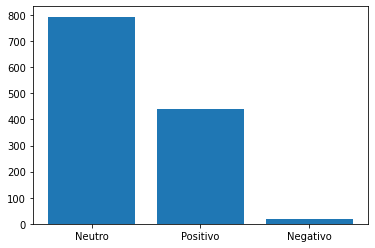

In [57]:
df_resultado = pd.DataFrame(df['resultado'].value_counts()).reset_index()
plt.bar(df_resultado['index'], df_resultado['resultado'])